# Preprocess data

In [2]:
import os
import shutil
import glob
from PIL import Image

import matplotlib.pyplot as plt

import splitfolders

import tensorflow as tf

tf.__version__

'2.5.0'

In [3]:
dirpaths = []

for dirpath, _, _ in os.walk('./data/beer_labels/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
    dirpaths.append(dirpath)

In [4]:
dirpaths[0:5]

['./data/beer_labels/',
 './data/beer_labels/5905279965201',
 './data/beer_labels/5903111989873',
 './data/beer_labels/5907222604595',
 './data/beer_labels/5905279965454']

In [5]:
len(dirpaths)

101

In [6]:
selected_dirpaths = []

for i in range(5, 101, 7):
    
    selected_dirpaths += dirpaths[i-3:i]

In [7]:
selected_dirpaths[:5]

['./data/beer_labels/5903111989873',
 './data/beer_labels/5907222604595',
 './data/beer_labels/5905279965454',
 './data/beer_labels/5906874605073',
 './data/beer_labels/5906874605042']

In [8]:
len(selected_dirpaths)

42

In [9]:
# def create_dir(path_list):
    
#     for path in path_list:
#         if not os.path.exists(path):
#             os.makedirs(path)


# paths = ['./data', './data/train', './data/val', './data/test']

# create_dir(paths)

In [10]:
'''
Move and rename files and folders
'''

j = 1  # no. of folder/class

for dirpath in selected_dirpaths:
    
    dst_dir = './data/input'
     
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    
    i = 1  # no. of image
    
    for jpg_file in glob.iglob(os.path.join(dirpath, '*.jpg')):
        
        img_path = os.path.join(dst_dir, 'class{}'.format(j))
        
        if not os.path.exists(img_path):
            os.mkdir(img_path)
        
        new_name = 'class{}/{}_{}.jpg'.format(j, j, i)
        
        shutil.copy(jpg_file, os.path.join(dst_dir, new_name))
        
        i += 1

    j += 1

In [11]:
# split images to train/val/test folders

splitfolders.ratio('./data/input', output='./data/output', seed=1337, ratio=(.7, .15, .15))

Copying files: 3263 files [00:00, 9087.17 files/s]


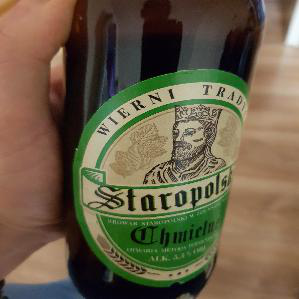

In [12]:
img = Image.open('./data/output/train/class1/1_10.jpg')
img

In [13]:
img.size

(299, 299)

# Create deep learning model

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
batch_size = 32
img_height = 299
img_width = 299

In [16]:
data_dir = './data/output/train/'
val_dir = './data/output/val/'
test_dir = './data/output/test//'

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               label_mode='int',
                                                               batch_size=batch_size,
                                                               image_size=(img_height, img_width))


Found 2265 files belonging to 42 classes.


In [18]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                  label_mode='int',
                                                                  batch_size=batch_size,
                                                                  image_size=(img_height, img_width))


Found 468 files belonging to 42 classes.


In [19]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='int',
                                                              batch_size=batch_size,
                                                              image_size=(img_height, img_width))


Found 530 files belonging to 42 classes.


In [20]:
num_classes = 42

In [21]:
model = tf.keras.Sequential([
    
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
        
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(num_classes)                                                      
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 299, 299, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 299, 299, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0

In [23]:
epochs = 14

Epoch 1/14
71/71 [==============================] - 10s 68ms/step - loss: 3.0629 - accuracy: 0.2274 - val_loss: 3.5004 - val_accuracy: 0.1111
Epoch 2/14
71/71 [==============================] - 4s 57ms/step - loss: 1.9973 - accuracy: 0.5885 - val_loss: 3.4903 - val_accuracy: 0.0833
Epoch 3/14
71/71 [==============================] - 4s 57ms/step - loss: 1.3582 - accuracy: 0.7863 - val_loss: 3.3350 - val_accuracy: 0.1004
Epoch 4/14
71/71 [==============================] - 4s 57ms/step - loss: 0.9715 - accuracy: 0.8958 - val_loss: 3.0953 - val_accuracy: 0.1581
Epoch 5/14
71/71 [==============================] - 4s 57ms/step - loss: 0.6744 - accuracy: 0.9426 - val_loss: 2.7377 - val_accuracy: 0.2927
Epoch 6/14
71/71 [==============================] - 4s 57ms/step - loss: 0.4869 - accuracy: 0.9717 - val_loss: 2.4925 - val_accuracy: 0.3440
Epoch 7/14
71/71 [==============================] - 4s 57ms/step - loss: 0.3591 - accuracy: 0.9770 - val_loss: 2.2146 - val_accuracy: 0.4188
Epoch 8/14
7

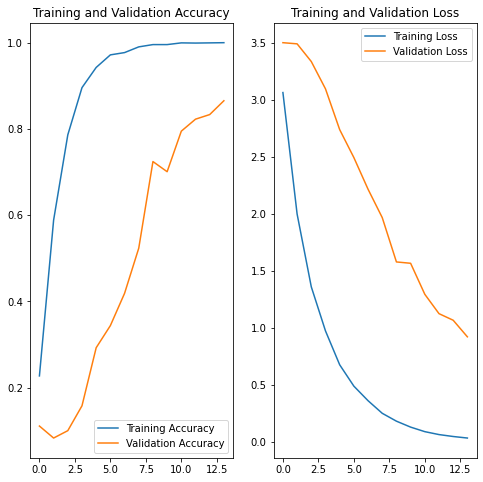

In [24]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_ds)

In [ ]:
model.save_weights(filepath='./saved_models/')

# Model interpretation

## GradCAM

In [25]:
import tensorflow.keras.backend as K
import cv2
import numpy as np

In [26]:
# select all the layers for which you want to visualize the outputs and store it in a list
outputs = [layer.output for layer in model.layers[:]]

# Define a new model that generates the above output
vis_model = tf.keras.Model(model.input, outputs)

# store the layer names we are interested in
layer_names = []
for layer in outputs:
    layer_names.append(layer.name.split("/")[0])

    
print("Layers that will be used for visualization: ")
print(layer_names)

Layers that will be used for visualization: 
['rescaling', 'conv2d', 'max_pooling2d', 'dropout', 'conv2d_1', 'max_pooling2d_1', 'dropout_1', 'conv2d_2', 'max_pooling2d_2', 'dropout_2', 'flatten', 'dense', 'batch_normalization', 'dense_1']


In [27]:
def get_CAM(processed_image, actual_label, layer_name=layer_names[9]):
    
    model_grad = tf.keras.Model([model.inputs], 
                               [model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_output_values, predictions = model_grad(processed_image)

        # watch the conv_output_values
        tape.watch(conv_output_values)

        ## Use binary cross entropy loss
        ## actual_label is 0 if cat, 1 if dog
        # get prediction probability of dog
        # If model does well, 
        # pred_prob should be close to 0 if cat, close to 1 if dog
        pred_prob = predictions[:,1] 
        
        # make sure actual_label is a float, like the rest of the loss calculation
        actual_label = tf.cast(actual_label, dtype=tf.float32)
        
        # add a tiny value to avoid log of 0
        smoothing = 0.00001 
        
        # Calculate loss as binary cross entropy
        loss = -1 * (actual_label * tf.math.log(pred_prob + smoothing) + (1 - actual_label) * tf.math.log(1 - pred_prob + smoothing))
#         print(f"binary loss: {loss}")
    
    # get the gradient of the loss with respect to the outputs of the last conv layer
    grads_values = tape.gradient(loss, conv_output_values)
    grads_values = K.mean(grads_values, axis=(0,1,2))
    
    conv_output_values = np.squeeze(conv_output_values.numpy())
    grads_values = grads_values.numpy()
    
    # weight the convolution outputs with the computed gradients
    for i in range(32): 
        conv_output_values[:,:,i] *= grads_values[i]
    heatmap = np.mean(conv_output_values, axis=-1)
    
    heatmap = np.maximum(heatmap, 0)
    heatmap /= heatmap.max()
    
    del model_grad, conv_output_values, grads_values, loss
   
    return heatmap

In [28]:
def show_sample(idx=None):
    
    # if image index is specified, get that image
    if idx:
        for img, label in test_ds.take(idx):
            sample_image = img[0]
            sample_label = label[0]
    # otherwise if idx is not specified, get a random image
    else:
        for img, label in test_ds.shuffle(1000).take(1):
            sample_image = img[0]
            sample_label = label[0]
    
    sample_image_processed = np.expand_dims(sample_image, axis=0)
    
    activations = vis_model.predict(sample_image_processed)
    
    pred_label = np.argmax(model.predict(sample_image_processed), axis=-1)[0]
    
    sample_activation = activations[0][0,:,:,2]
    
    sample_activation-=sample_activation.mean()
    sample_activation/=sample_activation.std()
    
    sample_activation *= 255
    sample_activation = np.clip(sample_activation, 0, 255).astype(np.uint8)
    
    heatmap = get_CAM(sample_image_processed, sample_label)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap * 255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
    
    converted_img = sample_image.numpy() / 255.
    
    super_imposed_image = cv2.addWeighted(converted_img, 0.8, heatmap.astype('float32'), 2e-3, 0.0)

    f,ax = plt.subplots(2,2, figsize=(15,8))

    ax[0,0].imshow(sample_image / 255.)
    ax[0,0].set_title(f"True label: {sample_label} \n Predicted label: {pred_label}")
    ax[0,0].axis('off')
    
    ax[0,1].imshow(sample_activation)
    ax[0,1].set_title("Random feature map")
    ax[0,1].axis('off')
    
    ax[1,0].imshow(heatmap)
    ax[1,0].set_title("Class Activation Map")
    ax[1,0].axis('off')
    
    ax[1,1].imshow(super_imposed_image)
    ax[1,1].set_title("Activation map superimposed")
    ax[1,1].axis('off')
    plt.tight_layout()
    plt.show()
  
    return activations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


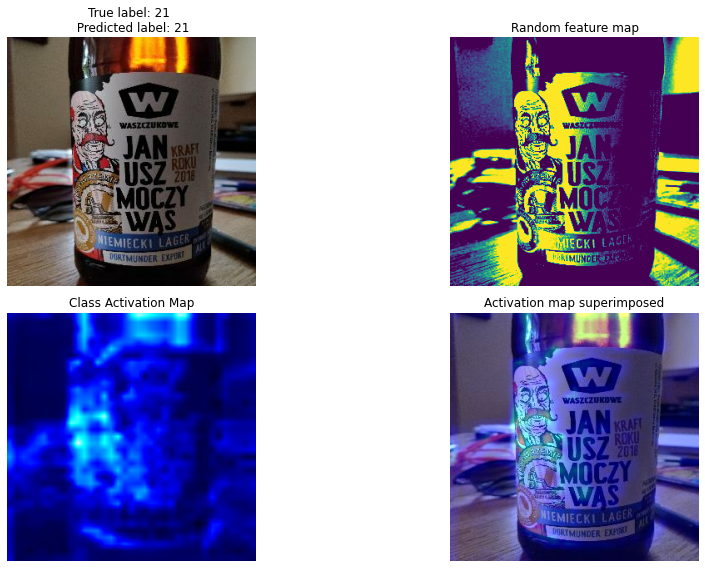

In [29]:
# Choose an image index to show, or leave it as None to get a random image

activations = show_sample(idx=None)

In [30]:
def show_gradcam(sample_image, sample_label, every_class_images=None):
    
    '''
    Function shows in one row four images: 
        * image used for making prediction
        * class activation map
        * activation map superimposed
        * image of class which alrgorith predicted
    
    Recommended to display wrongly classified images.
    
    Source:
    https://www.coursera.org/learn/advanced-computer-vision-with-tensorflow/ungradedLab/Y43NS/gradcam-lab-4
    '''

    sample_image_processed = np.expand_dims(sample_image, axis=0)
    
    activations = vis_model.predict(sample_image_processed)
    
    pred_label = np.argmax(model.predict(sample_image_processed), axis=-1)[0]
    
    sample_activation = activations[0][0,:,:,:]
    
    sample_activation-=sample_activation.mean()
    sample_activation/=sample_activation.std()
    
    sample_activation *=255
    sample_activation = np.clip(sample_activation, 0, 255).astype(np.uint8)
    
    heatmap = get_CAM(sample_image_processed, sample_label)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap * 255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
    
    converted_img = sample_image.numpy() / 255.
    
    super_imposed_image = cv2.addWeighted(converted_img, 0.8, heatmap.astype('float32'), 2e-3, 0.0)     
    
    sample_image /= 255.
    
    f,ax = plt.subplots(1,4, figsize=(15,8))
    
    ax[0].imshow(sample_image)
    ax[0].set_title(f"True label: {sample_label} \n Predicted label: {pred_label}")
    ax[0].axis('off')

    ax[1].imshow(heatmap)
    ax[1].set_title("Class Activation Map")
    ax[1].axis('off')
    
    ax[2].imshow(super_imposed_image)
    ax[2].set_title("Activation map superimposed")
    ax[2].axis('off')
    
    ax[3].imshow(every_class_images[pred_label] / 255.)
    ax[3].set_title(f"Image of {pred_label} class")
    ax[3].axis('off')

    plt.tight_layout()
    plt.show()

In [31]:
# x, y = next(iter(test_ds))
# image = x[0]
# true_index = y[0]

# plt.imshow(image/255.)
# plt.axis('off')
# plt.show()


# # Expand the validation image to (1, 224, 224, 3) before predicting the label
# prediction_scores = model.predict(np.expand_dims(image, axis=0))
# predicted_index = np.argmax(prediction_scores)
# print(f"True label: {true_index}")
# print(f"Predicted label: {predicted_index}")


In [32]:
# x, y = next(iter(test_ds))

# for i in range(31):
    
#     if y[i]==32:
#         plt.imshow(x[i]/255.)
#         plt.title(f'Class label: {y[i]}')
#         plt.axis('off')
#         plt.show()

In [33]:
# y_pred = model.predict(test_ds)
# y_pred.shape

In [34]:
# y_pred[54, :]

In [35]:
# print(f'{np.max(y_pred[54])}, {np.argmax(y_pred[54])}')

In [36]:
#  for img, label in test_ds.shuffle(1000).take(1):
#             sample_image = img[0]
#             sample_label = label[0]

In [37]:
# test_ds

## Checking classes with most incorrectly classified images from test dataset

In [38]:
one_batch_test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                        label_mode='int',
                                                                        batch_size=530,
                                                                        image_size=(img_height, img_width))

Found 530 files belonging to 42 classes.


In [39]:
full_test_ds = list(next(iter(one_batch_test_ds)))

In [40]:
full_test_ds[0].shape

TensorShape([530, 299, 299, 3])

In [41]:
full_test_ds[1].shape

TensorShape([530])

In [42]:
y_true = full_test_ds[1]
y_pred = model.predict(full_test_ds[0])

In [43]:
test_images = full_test_ds[0]

In [44]:
# create list consisting of 42 images representing 42 classes

every_class_img = np.ndarray((42,299,299,3))

for label in range(42):
    
    for idx in range(530):
        
        if y_true[idx] == label:
            
            every_class_img[label] = test_images[idx] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


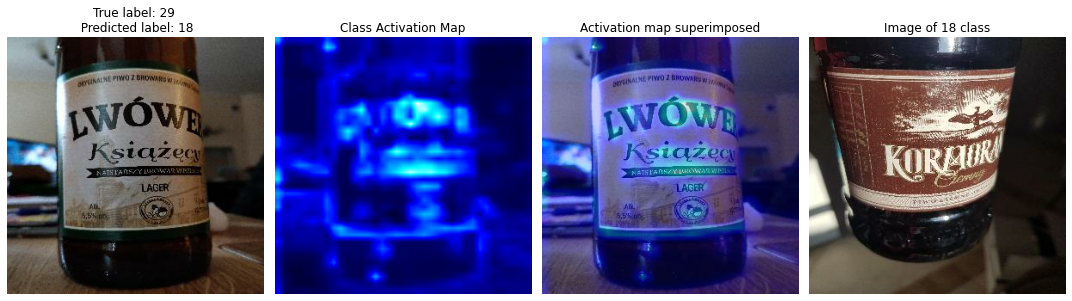

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


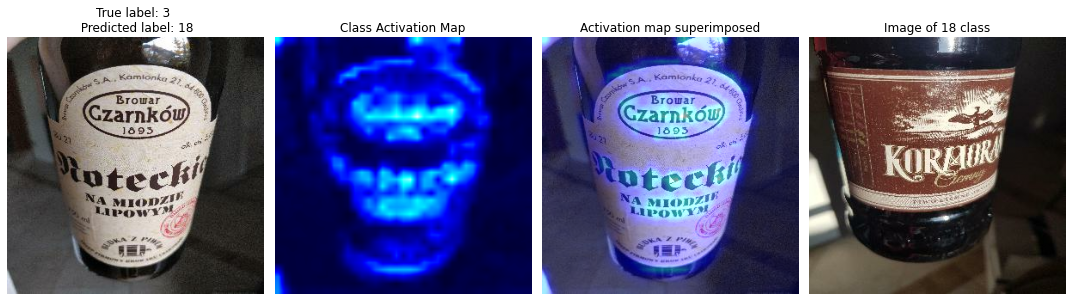

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


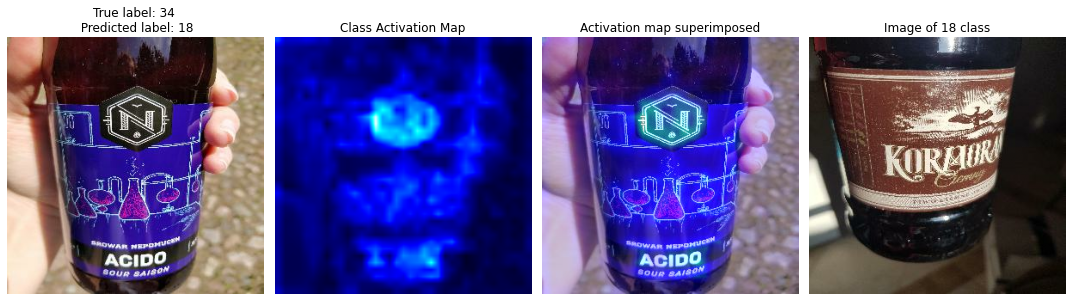

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


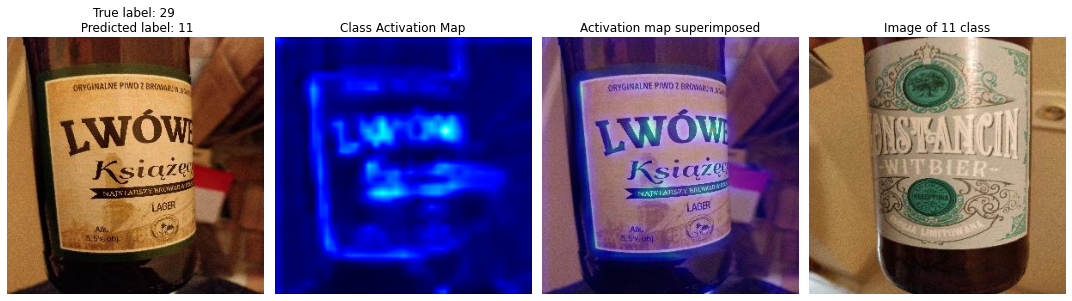

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


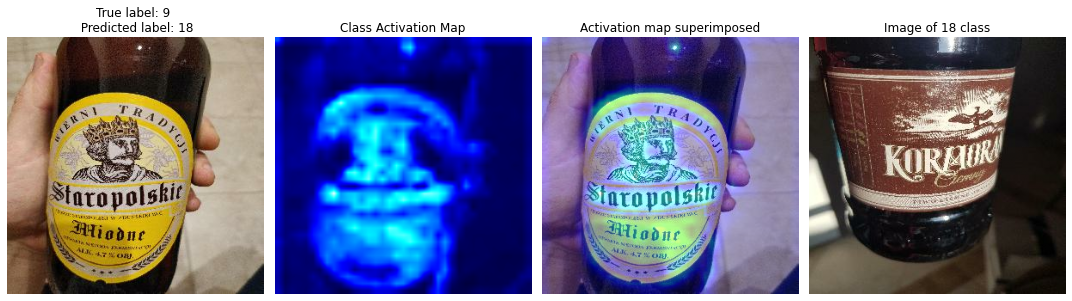

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


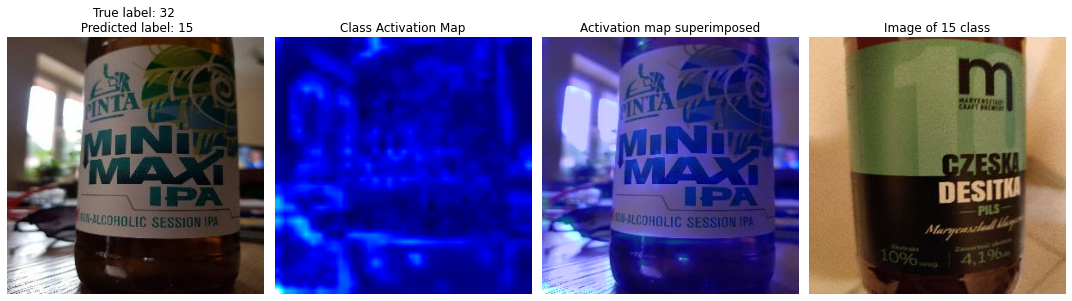

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


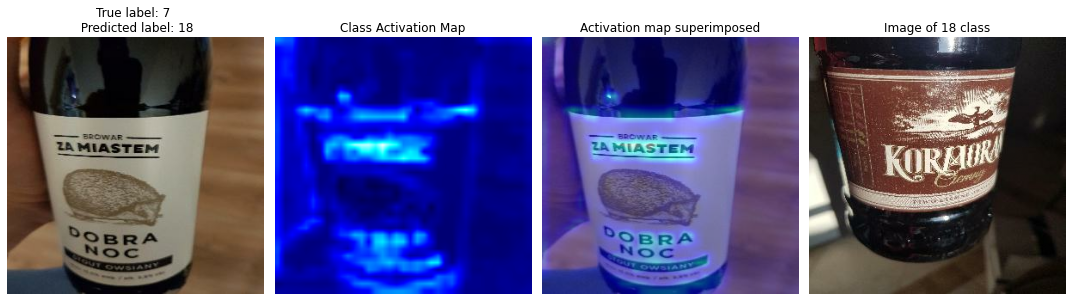

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


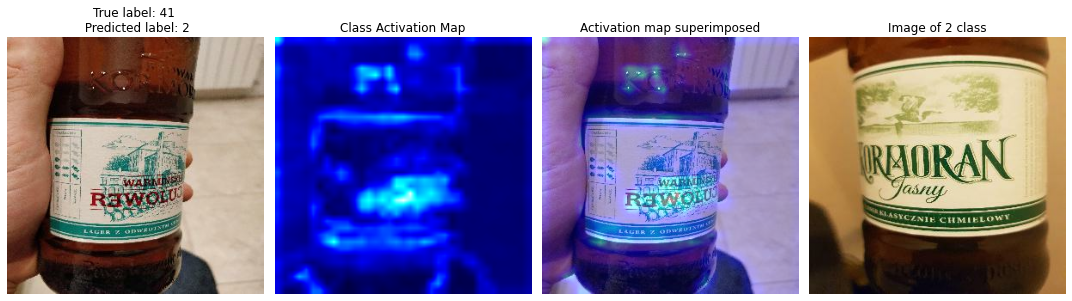

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


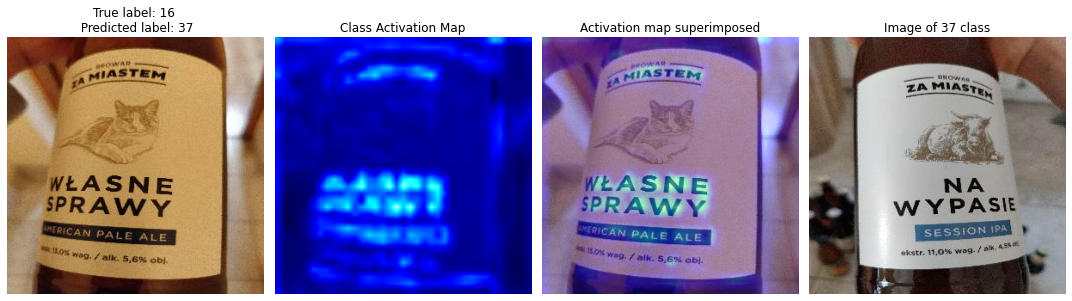

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


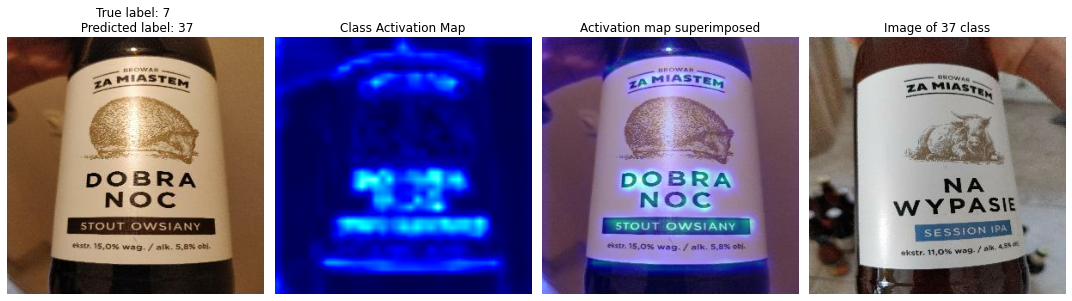

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


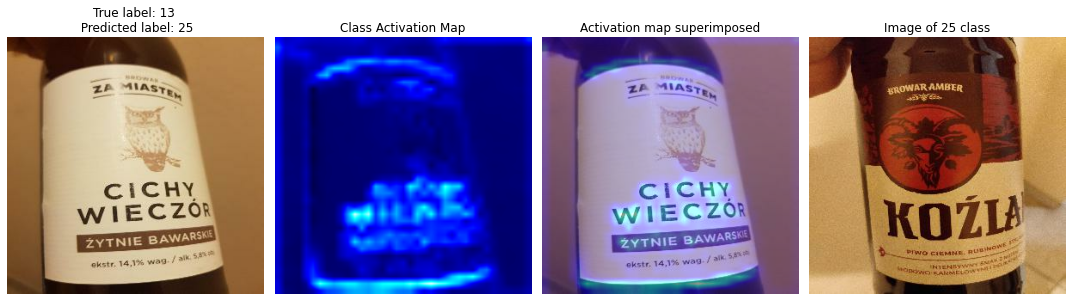

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


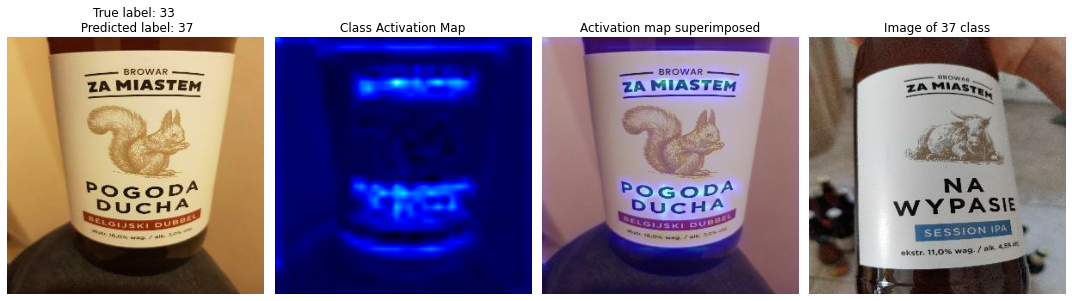

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


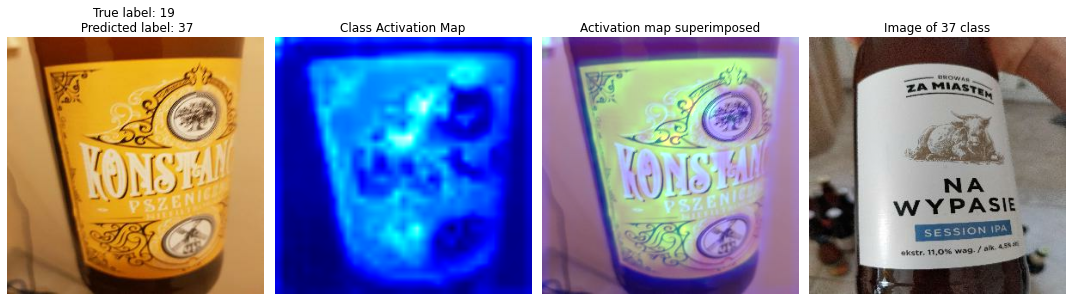

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


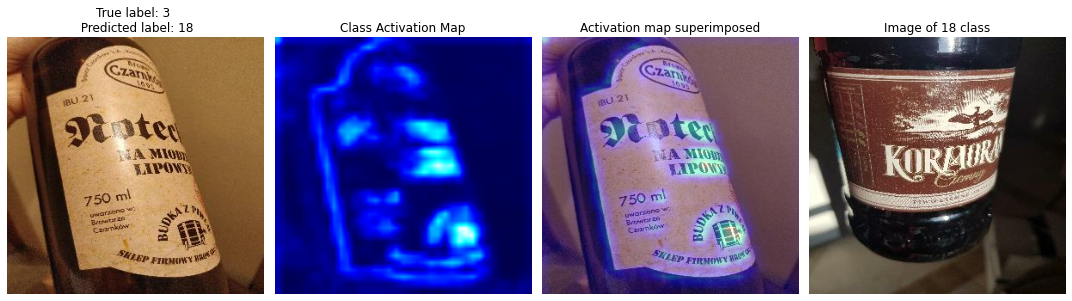

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


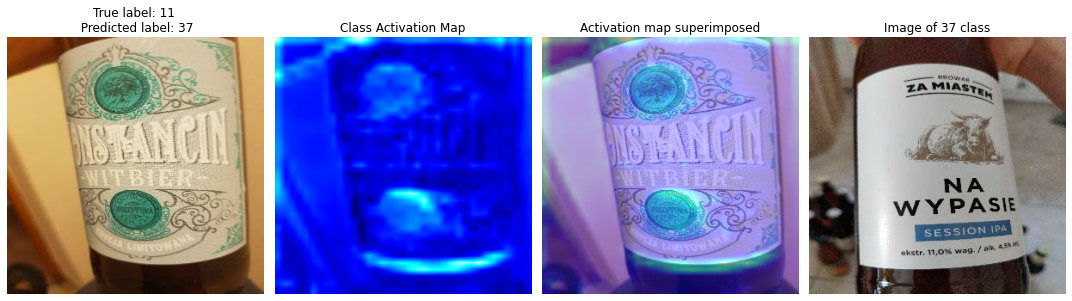

In [48]:
wrong_pred_idx = []

displayed_img_count = 0

for i in range(530):

    if np.argmax(y_pred[i]) != y_true[i]:
        
        image = full_test_ds[0][i]
        true_label = y_true[i]
        
        if displayed_img_count < 15:
            show_gradcam(image, true_label, every_class_img)
        displayed_img_count += 1
        
        wrong_pred_idx.append(i)
        
        

## Conclusions based on GradCAM

There are few beer labels which are very similar with key difference an animal in the middle of the label.

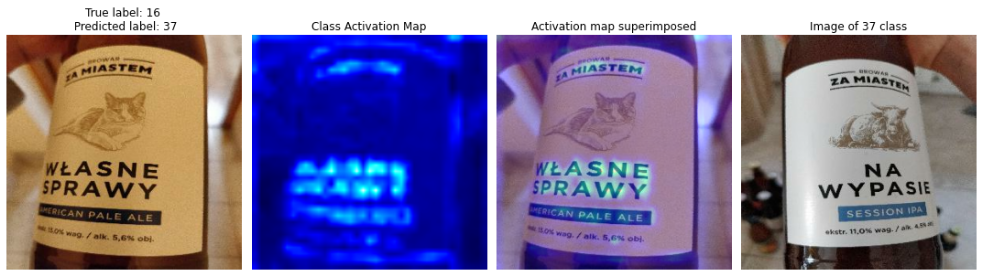

As shown above, model does not include animal for prediction which should be crucial having multiple simpliar classes. It is caused probably by it not being distinctive enough. 

In [49]:
wrong_pred_classes = []

for idx in wrong_pred_idx:
    wrong_pred_classes.append(y_true[idx])

In [50]:
import pandas as pd

In [51]:
data = {'class': [],
       'count': []}

for i in range(num_classes):
    
    cnt = wrong_pred_classes.count(i)
    
    if cnt > 0:
        
        print(f'Image from class {i} was wrongly classified {cnt} times.')
        
        data['class'].append(i)
        data['count'].append(cnt)

Image from class 0 was wrongly classified 1 times.
Image from class 3 was wrongly classified 3 times.
Image from class 7 was wrongly classified 4 times.
Image from class 8 was wrongly classified 1 times.
Image from class 9 was wrongly classified 2 times.
Image from class 11 was wrongly classified 5 times.
Image from class 12 was wrongly classified 3 times.
Image from class 13 was wrongly classified 8 times.
Image from class 14 was wrongly classified 1 times.
Image from class 16 was wrongly classified 8 times.
Image from class 17 was wrongly classified 1 times.
Image from class 19 was wrongly classified 3 times.
Image from class 21 was wrongly classified 3 times.
Image from class 22 was wrongly classified 2 times.
Image from class 24 was wrongly classified 2 times.
Image from class 27 was wrongly classified 6 times.
Image from class 28 was wrongly classified 6 times.
Image from class 29 was wrongly classified 5 times.
Image from class 32 was wrongly classified 1 times.
Image from class 

In [52]:
df = pd.DataFrame(data)
df.head()

class  count
0      0      1
1      3      3
2      7      4
3      8      1
4      9      2

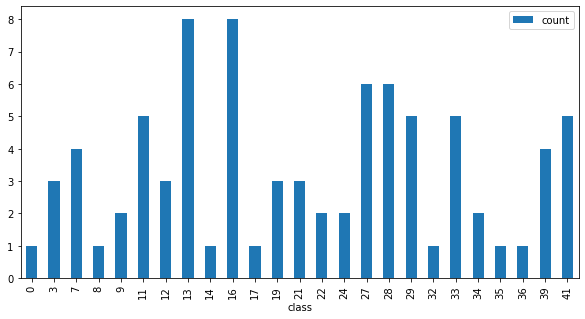

In [53]:
df.plot.bar(x='class', y='count', figsize=(10,5));

In [ ]:
for label in range(42):
    
    if label not in wrong_pred_classes:
        
        

In [56]:
# clear data 
# del full_test_ds, test_ds, train_ds, val_dir, validation_ds 